In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="white", context='paper')
import numpy as np
# from scipy.stats import spearmanr
import warnings
warnings.filterwarnings('ignore')
# import networkx as nx
import matplotlib.pyplot as plt
import datetime as dt
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.max_columns", None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
airbnb = pd.read_csv('../data/airbnb_preprocessed.csv')

In [3]:
# 1. DATA LOADING
df = airbnb.copy()
np.random.seed(42)

X = df.select_dtypes(include='number').fillna(0).drop(['review_scores_rating','id'], axis=1)
y = df['review_scores_rating']

# 2. DATA PREPARATION
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. TRAINING A MODEL
print("\nTraining the model...")
model = LinearRegression()
model.fit(X_train_scaled, y_train)
print("Model training complete!")

# Display model coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature}: {coef:.4f}")
print(f"  Intercept: {model.intercept_:.4f}")

# 4. PREDICTING ON TEST SET
print("\nMaking predictions on test set...")
y_pred = model.predict(X_test_scaled)

# Display first few predictions
print("\nSample predictions (first 10):")
comparison = pd.DataFrame({
    'Actual': y_test[:10].values,
    'Predicted': y_pred[:10],
    'Difference': y_test[:10].values - y_pred[:10]
})
print(comparison)

# 5. EVALUATING THE MODEL
print("\n" + "="*50)
print("MODEL EVALUATION METRICS")
print("="*50)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Training set size: 46646
Test set size: 11662

Training the model...
Model training complete!

Model Coefficients:
  host_response_time: 0.0001
  host_response_rate: 0.0031
  host_acceptance_rate: -0.0113
  host_is_superhost: 0.0651
  host_listings_count: 0.0054
  host_total_listings_count: -0.0285
  host_has_profile_pic: 0.0029
  latitude: 0.0240
  longitude: -0.8947
  accommodates: -0.0223
  bathrooms: 0.0082
  bedrooms: 0.0072
  beds: -0.0149
  price: 0.0127
  minimum_nights: 0.0012
  maximum_nights: -0.0261
  minimum_minimum_nights: 0.0094
  maximum_minimum_nights: -0.0068
  minimum_maximum_nights: 0.0181
  maximum_maximum_nights: -0.0420
  minimum_nights_avg_ntm: -0.0005
  maximum_nights_avg_ntm: 0.0186
  estimated_occupancy_l365d: 0.0122
  instant_bookable: -0.0235
  host_verifications_email: 0.0075
  host_verifications_phone: 0.0101
  host_verifications_work_email: 0.0073
  amenities_Air conditioning: 0.0041
  amenities_Bathtub: 0.0065
  amenities_Bed linens: -0.0088
  amenitie

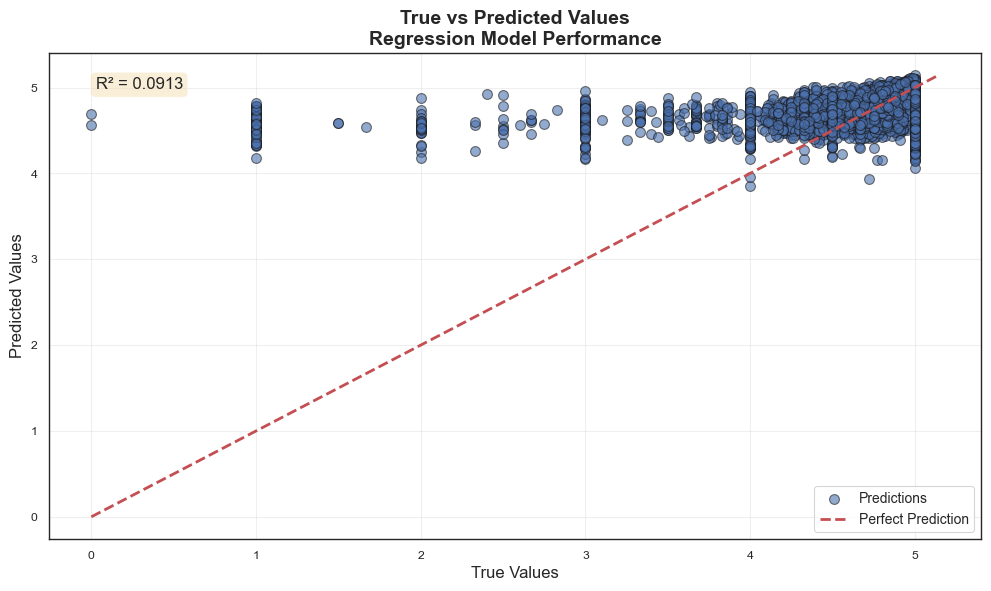

In [4]:
# VISUALIZATION: True vs Predicted Values
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k', s=50, label='Predictions')

# Perfect prediction line (diagonal)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

# Labels and title
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('True vs Predicted Values\nRegression Model Performance', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Add R² score to the plot
plt.text(0.05, 0.95, f'R² = {r2:.4f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()